<a href="https://colab.research.google.com/github/sallyy1/Data-Analysis/blob/sallyy1-patch-1/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%B8%EC%9D%B4%EC%96%B8%EC%8A%A4%EC%8A%A4%EC%BF%A8_(%EC%9D%B4%EB%AF%B8%EC%A7%80_%EC%B2%98%EB%A6%AC_%EA%B8%B0%EC%B4%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pillow를 이용한 이미지 처리¶**
가장 먼저 소개할 파이썬 이미지 처리 패키지는 Pillow이다. Pillow는 이전에 사용되던 PIL(Python Imaging Library)패키지를 대체하기 위한 것이다. JPEG, BPM, GIF, PNG, PPM, TIFF 등의 다양한 포맷을 지원하고 초보자가 다루기 쉽다는 장점이 있다. 여기에서는 Pillow 버전 5.2를 기준으로 설명한다. PIL 패키지의 대체이므로 임포트 이름이 PIL 패키지와 같다.

In [14]:
# 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL
PIL.__version__

'7.0.0'

# **이미지 읽고 쓰기¶**
우선 인터넷에서 실습을 위한 이미지 파일을 내려받자.

In [1]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

--2020-10-29 04:29:30--  https://www.python.org/static/community_logos/python-logo-master-v3-TM.png
Resolving www.python.org (www.python.org)... 151.101.248.223, 2a04:4e42:50::223
Connecting to www.python.org (www.python.org)|151.101.248.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83564 (82K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  81.61K  --.-KB/s    in 0.03s   

2020-10-29 04:29:30 (2.67 MB/s) - ‘logo.png’ saved [83564/83564]



In [2]:
# Pillow 패키지에서 제공하는 Image 클래스를 사용하면 여러가지 다양한 포맷의 이미지를 읽고 변환하여 저장할 수 있다.
# open 메서드는 이미지 파일을 열 수 있다.

from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

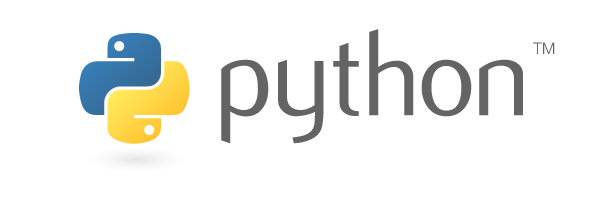

In [3]:
# 주피터 노트북에서는 Image 클래스 객체를 바로 볼 수 있다.
img_logo_png

In [4]:
# 파일로 저장할 때는 save 메서드를 사용한다.
# 이 때 확장자를 지정하면 해당 이미지 형식으로 자동 변환하여 저장한다.

img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

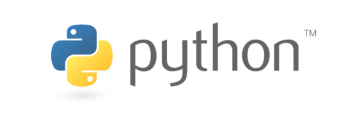

In [9]:
# 이미지 데이터 처리를 위해 Image 클래스 객체를 NumPy 배열로 변환할 때는 np.array 함수를 사용한다.
# NumPy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다.

img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

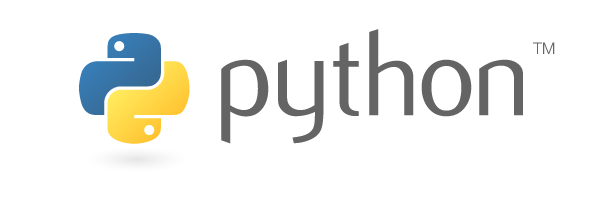

In [10]:
# 반대로 NumPy 배열을 Image 객체로 바꿀 때는 fromarray 클래스 메서드를 사용한다.

Image.fromarray(img_logo_array)

# **이미지 크기 변환¶**
이미지의 크기를 확대 또는 축소하려면 resize 메서드를 사용한다. 인수로는 새로운 사이즈의 튜플을 입력한다.

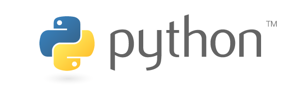

In [15]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

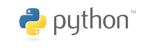

In [18]:
# 썸네일(thumbnail) 이미지를 만들고 싶다면 Image객체의 thumbnail 메서드를 사용한다.
# resize 메서드는 원래 객체는 그대로 유지한 채 변환된 이미지를 반환하지만 thumbnail 메서드는 원래 객체 자체를 바꾸는 인플레이스(in-place) 메소드이므로 주의하여 사용한다.

img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

# **이미지 회전¶**
이미지를 회전하기 위해서는 rotate 메서드를 호출한다. 인수로는 도(degree) 단위의 각도를 입력한다. 입력 각도만큼 반시계 방향으로 회전한다.

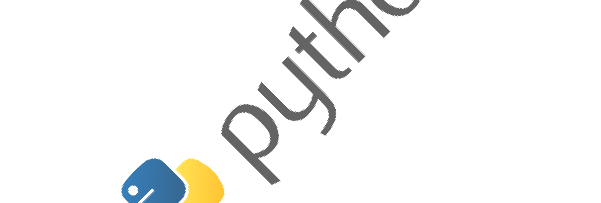

In [19]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

# **이미지 잘라내기¶**
crop 메서드를 사용하면 이미지에서 우리가 관심이 있는 특정 부분(ROI: region of interest)만 추출 할 수 있다. 인수로 ROI의 좌-상의 좌표, 우-하의 좌표를 받는다. 아래의 코드는 파이썬 로고이미지에서 파이썬의 마크만 잘라낸 것이다.

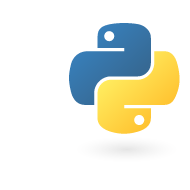

In [20]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

# **Scikit-Image¶**
scikit-image 패키지도 이미지 처리에 많이 사용된다. 여기에서는 0.14 버전을 기준으로 설명한다.

In [22]:
import skimage
skimage.__version__

'0.16.2'

# **샘플 이미지¶**
Scikit-Image는 data라는 모듈을 통해 샘플 이미지 데이터를 제공한다. 이미지는 NumPy 배열 자료형으로 사용한다.

In [23]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

# **이미지 읽고 쓰기¶**
Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지의 imsave, imread 명령을 사용한다. 파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환한다.

In [24]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

# **색공간 변환¶**
Scikit-Image는 그레이스케일, RGB, HSV 등의 색공간을 변환하는 기능을 color 서브패키지에서 제공한다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

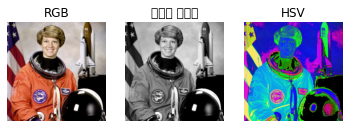

In [25]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

# **OpenCV¶**
OpenCV(Open Source Computer Vision)은 이미지 처리, 컴퓨터 비전을 위한 라이브러리이다. Windows, Linux, OS X(Mac OS), iOS, Android 등 다양한 플랫폼을 지원한다. 실시간 이미지 프로세싱에 중점을 둔 라이브러리이며 많은 영상처리 알고리즘을 구현해 놓았다.



# **설치¶**
OpenCV는 다양한 이미지 특징(feature) 처리 기능을 제공하는데 이 기능은 무료 라이선스가 아니다. 따라서 아니콘다나 pip 명령으로 내려받은 OpenCV 패키지에는 이 기능이 제외되어 있다.

이 기능까지 사용하고 싶은 개인 사용자는 OpenCV 소스코드를 내려받아 직접 컴파일을 해서 사용해야 한다. OpenCV를 컴파일하려면 GNU GCC C/C++ 컴파일러와 CMake 전처리기가 설치되어 있어야 하므로 윈도우나 맥은 빌드하기 까다롭다. 되도록 리눅스 운영체제나 도커를 사용하기를 권장한다.

GNU GCC C/C++ 컴파일러와 CMake 전처리기를 설치한 후에는 다음과 같이 OpenCV를 컴파일할 수 있다. 다음은 아나콘다 파이썬 3.7이 설치된 리눅스에서 OpenCV 4.1을 설치하는 스크립트다.

In [26]:
import cv2
cv2.__version__

'4.1.2'

# **파일 읽고 쓰기¶**
이미지를 읽을 때는 imread 메서드를 사용하는데 인수로 파일이름과 함께 flag를 넣을 수 있다.

cv2.IMREAD_COLOR: 이미지 파일을 컬러로 읽어들인다. 투명한 부분은 무시되며, flag디폴트 값이다.

cv2.IMREAD_GRAYSCALE: 이미지를 그레이스케일 읽어 들인다. 실제 이미지 처리시 중간단계로 많이 사용한다.

cv2.IMREAD_UNCHANGED: 이미지파일을 알파 채널까지 포함하여 읽어 들인다.

각각 1, 0, -1 로도 표현한다.

In [27]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(512, 512, 3)

OpenCV도 이미지 데이터를 NumPy 배열로 저장하지만 색 채널의 순서가 R-G-B 순서가 아니라, B-G-R 순서로 뒤바뀌어 있다는 점에 주의한다. 이렇게 만들어진 이유는 OpenCV를 개발하던 초기에는 BGR 색공간이 카메라 제조사나 소프트웨어 개발자들에게 보편적이었기 때문이다.

In [28]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b])

cvtColor 명령을 사용하면 더 간단하게 색공간을 변환할 수도 있다.

In [29]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

이미지 파일을 만들 때는 imwrite 명령을 사용한다.

In [30]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray)

True

# **이미지 크기 변환¶**
resize() 명령으로 이미지 크기 변환 기능을 제공한다.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_

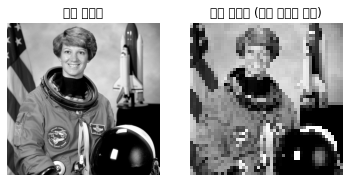

In [31]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap = plt.cm.gray)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap = plt.cm.gray)
plt.title("축소 이미지 (같은 크기로 표현)")
plt.axis("off")

plt.show()